In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
path = "data/exp3/CIFAR10_cons_bi_v3_val_old.csv"
df = pd.read_csv(path)
df.head()
df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
print(df["Name"].value_counts())
#print(df.groupby("Name")["val acc"].mean()) 
print(df.groupby("Name")["test acc"].mean())
#print(df.head())

Name
MambaModel_s6_BIMODULE_placebo      6
MambaModel_s6_BIMODULE              6
MambaModel_diag_BIMODULE_placebo    5
MambaModel_diag_BIMODULE            5
MambaModel_diag                     5
MambaModel_s6                       5
Name: count, dtype: int64
Name
MambaModel_diag                     0.824960
MambaModel_diag_BIMODULE            0.828160
MambaModel_diag_BIMODULE_placebo    0.822840
MambaModel_s6                       0.785600
MambaModel_s6_BIMODULE              0.800100
MambaModel_s6_BIMODULE_placebo      0.787533
Name: test acc, dtype: float64


In [3]:
df.groupby("Name")["val acc"].mean()
df.groupby("Name")["test acc"].mean()

Name
MambaModel_diag                     0.824960
MambaModel_diag_BIMODULE            0.828160
MambaModel_diag_BIMODULE_placebo    0.822840
MambaModel_s6                       0.785600
MambaModel_s6_BIMODULE              0.800100
MambaModel_s6_BIMODULE_placebo      0.787533
Name: test acc, dtype: float64

In [4]:
path = "data/exp3/IMDBtoken_bi_v3_val.csv"
df = pd.read_csv(path)
df.head()
df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
print(df["Name"].value_counts())
#print(df.groupby("Name")["val acc"].mean())
print(df.groupby("Name")["test acc"].mean())

Name
MambaModel_s6_XL                    5
MambaModel_diag_XL                  5
MambaModel_diag                     5
MambaModel_diag_BIMODULE_placebo    5
MambaModel_diag_BIMODULE            5
MambaModel_s6_BIMODULE_placebo      5
MambaModel_s6_BIMODULE              5
MambaModel_s6                       5
Name: count, dtype: int64
Name
MambaModel_diag                     0.852320
MambaModel_diag_BIMODULE            0.846096
MambaModel_diag_BIMODULE_placebo    0.846912
MambaModel_diag_XL                  0.855168
MambaModel_s6                       0.857920
MambaModel_s6_BIMODULE              0.863520
MambaModel_s6_BIMODULE_placebo      0.857280
MambaModel_s6_XL                    0.859920
Name: test acc, dtype: float64


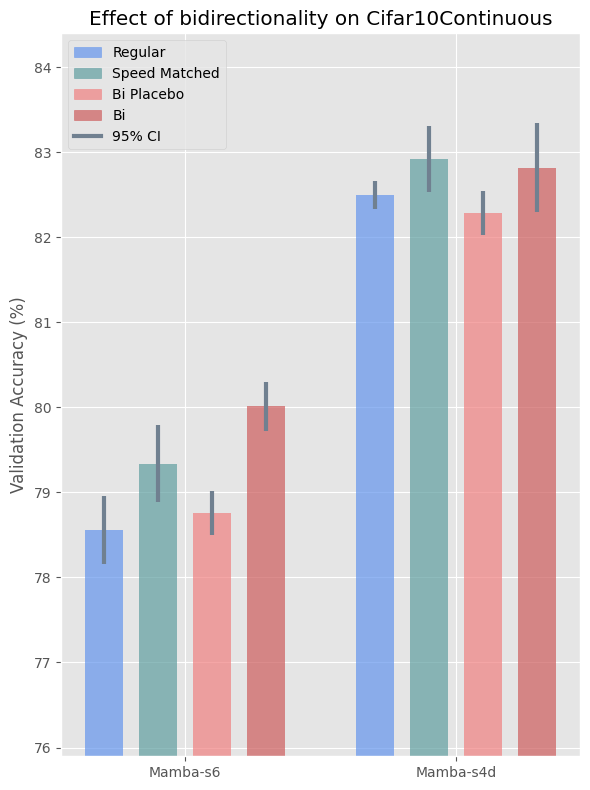

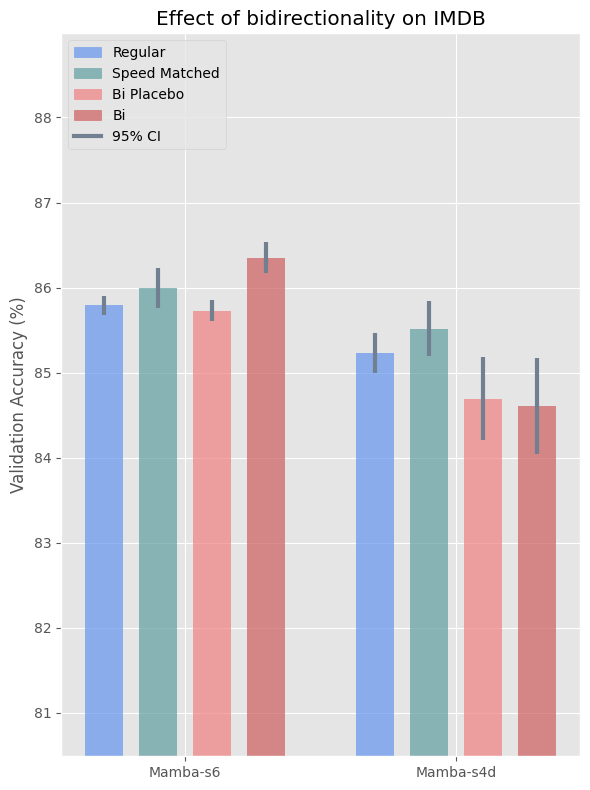

In [6]:
plt.style.use("ggplot")

def bi_dir_plot(dataset="CIFAR10_cons_bi_v3_val.csv", ci=1):
   df = pd.read_csv("data/exp3/"+dataset)
   df.head()
   df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
   df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
   
   order = ["MambaModel_s6", "MambaModel_s6_XL", "MambaModel_s6_BIMODULE_placebo", "MambaModel_s6_BIMODULE",
            "MambaModel_diag", "MambaModel_diag_XL","MambaModel_diag_BIMODULE_placebo", "MambaModel_diag_BIMODULE"]
   
   c = -1
   alpha = 0.7
   colors = ["cornflowerblue", "cadetblue","lightcoral", "indianred"]
   colors = colors + [None] + colors
   mean_avg = 0
   plt.figure(figsize=(6,8))   
   for model in order:
      c+=1
      if c == 4: c+=1
      d = df[df.Name==model]["test acc"].values
      
      mean = d.mean()*100
      mean_avg += mean
      CI = 1.96*(d.std()/np.sqrt(len(d)))*100
      plt.bar(c, mean, color=colors[c], width=0.7, alpha=alpha)
      plt.vlines(c, mean-CI, mean+CI, linewidth=3, color="slategray")
         
   
   
   import matplotlib.patches as mpatches
   from matplotlib.lines import Line2D
   
   red_patch = [
              mpatches.Patch(color='cornflowerblue', label='Regular', alpha=alpha),
               mpatches.Patch(color='cadetblue', label='Speed Matched', alpha=alpha),
              mpatches.Patch(color='lightcoral', label='Bi Placebo', alpha=alpha),
              mpatches.Patch(color='indianred', label='Bi', alpha=alpha),
              Line2D([0],[0],color='slategray', label='95% CI', linewidth=3),
             ]
   plt.ylim(mean_avg/8-5, mean_avg/8+3.5)
   plt.legend(handles=red_patch, ncol=1, loc="upper left");
   plt.ylabel("Validation Accuracy (%)", rotation=90)
   dataset_name = "IMDB" if "IMDB" in dataset else "Cifar10Continuous"
   plt.title(f"Effect of bidirectionality on {dataset_name}")
   plt.xticks([1.5,6.5], ["Mamba-s6", "Mamba-s4d"]);
   plt.tight_layout()
   plt.savefig(f"data/exp3/bi_{dataset_name}.png", dpi=200)
   plt.show()
   
   
bi_dir_plot()
bi_dir_plot(dataset="IMDBtoken_bi_v3_val.csv")